In [2]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *
import corner.corner as corner

In [3]:
df1_data = {'App Mag': [13.233, 14.053, 14.976], 
            'Errors': [0.1, 0.1, 0.1], 
            'Filter': ['H', "I", 'r']}
df1 = pd.DataFrame(df1_data)
df1

,App Mag,Errors,Filter
0,13.233,0.1,H
1,14.053,0.1,I
2,14.976,0.1,r


In [6]:
s = System(df1, 100, 0.1)
#s.init_age_prior

In [ ]:
mdf = maketable('WD', filters=["H", "J"])

In [ ]:
findMags(mdf, 1.13487333e+00, 9.10543304e+09, 1.00003039e+02, filters=['H', 'J'])

In [14]:
sampler = MCMCSampler(s, num_threads=5, num_temps=5, num_walkers=150, table_type='WD', filters=["H", "I", "r"])

In [15]:
sampler.curr_pos

array([[[2.17950823e-01, 4.12037174e+09, 1.00134814e+02],
        [8.95626182e-01, 1.33127561e+08, 9.98629257e+01],
        [7.80789060e-01, 4.73916246e+09, 1.00088226e+02],
        ...,
        [9.64041950e-01, 2.83247005e+09, 1.00027575e+02],
        [6.23040351e-01, 3.01680228e+09, 9.99147999e+01],
        [1.22700384e+00, 8.37881261e+08, 9.98074154e+01]],

       [[1.20615144e+00, 5.29737332e+09, 9.98297672e+01],
        [1.23845791e+00, 2.17400934e+09, 1.00082743e+02],
        [9.95182377e-01, 5.76836681e+08, 1.00136881e+02],
        ...,
        [5.54029578e-01, 5.09874931e+09, 9.99307330e+01],
        [3.57848892e-01, 4.28713393e+09, 9.98282687e+01],
        [5.67756626e-01, 1.29706848e+09, 1.00014585e+02]],

       [[7.79817552e-01, 1.52708253e+09, 1.00016398e+02],
        [3.51363187e-01, 2.57184584e+09, 1.00202909e+02],
        [7.11800374e-01, 2.73775556e+09, 9.99988818e+01],
        ...,
        [5.37627361e-01, 3.43417972e+09, 9.99571894e+01],
        [1.20293263e+00, 3.94

In [16]:
sampler.run_sampler(1000, 100, 1, "test2.hdf5")

Starting Burn in


ValueError: Attempting to start with samples outside posterior support.

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 760x760 with 9 Axes>]

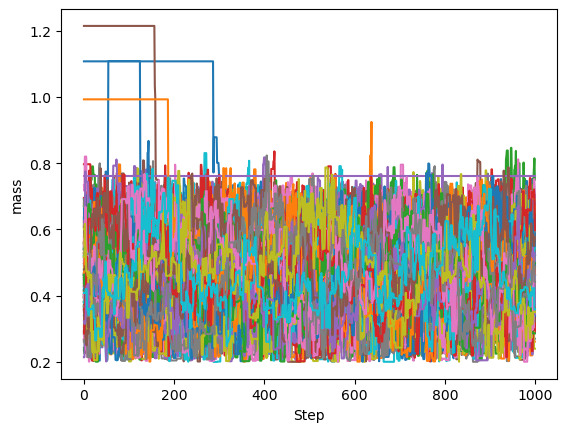

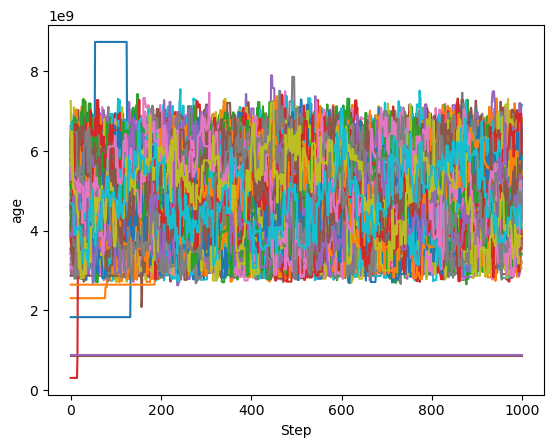

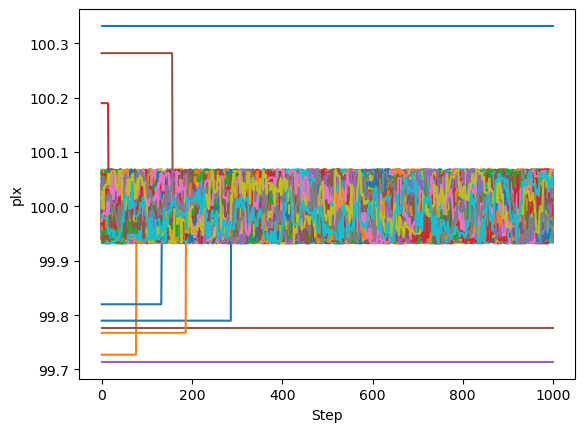

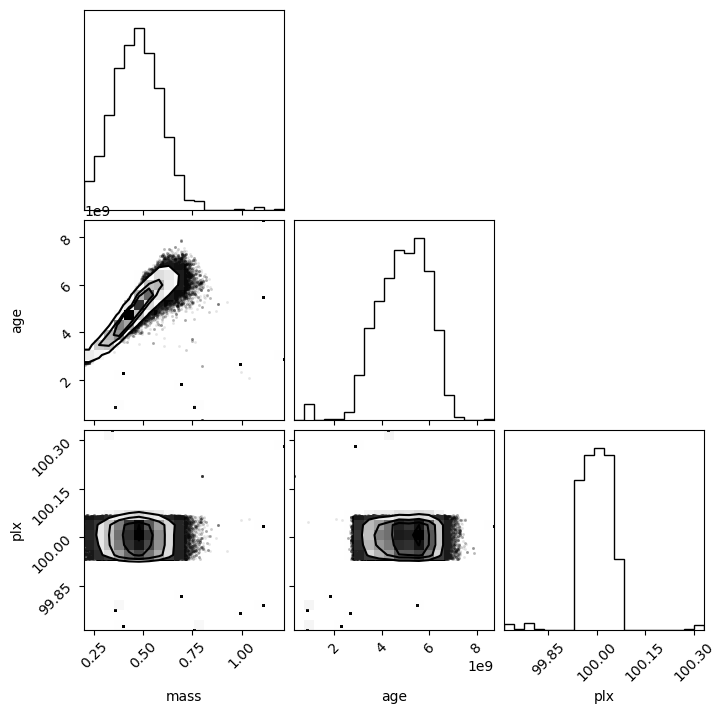

In [10]:
sampler.examine_chains()

In [ ]:
test_params = np.array([2.17289824e-01, 1.36642406e+10, 9.99720353e+01])
df1["App Mag"]

#findMags(df1, test_params[0], test_params[1], test_params[2], filts)

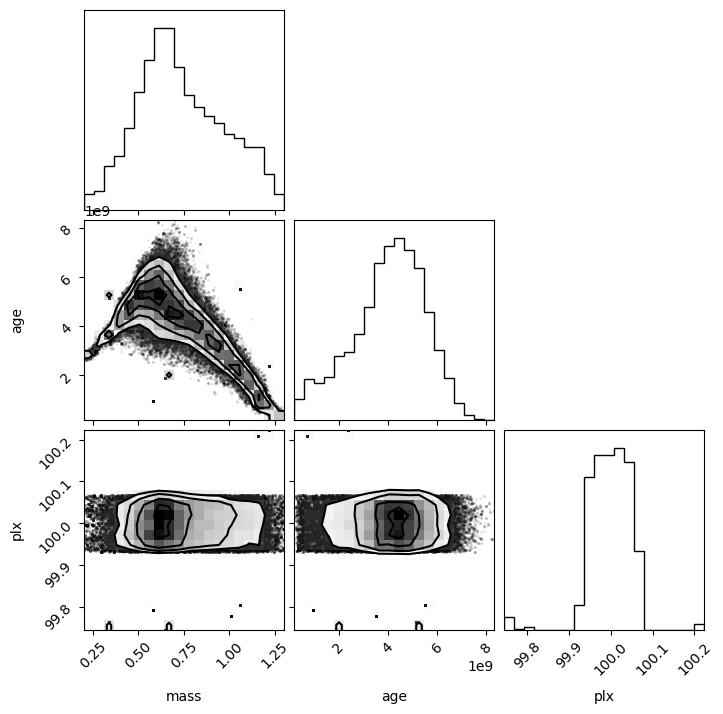

In [18]:
flatchain = np.copy(sampler.results.post)
flatchain.shape
figure = corner(flatchain,
                labels=['mass', 'age', 'plx'])